<a href="https://colab.research.google.com/github/Isenlith/ProcImag/blob/master/FFT2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Nome: Leandro da Silva de Souza

In [0]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

## Definição de funções

In [0]:
def bit_reverse_traverse(a):
    # (c) 2014 Ryan Compton
    # ryancompton.net/2014/06/05/bit-reversal-permutation-in-python/
    n = a.shape[0]
    assert(not n&(n-1) ) # assert that n is a power of 2
    if n == 1:
        yield a[0]
    else:
        even_index = np.arange(int(n/2))*2
        odd_index = np.arange(int(n/2))*2 + 1
        for even in bit_reverse_traverse(a[even_index]):
            yield even
        for odd in bit_reverse_traverse(a[odd_index]):
            yield odd
 
def get_bit_reversed_list(l):
    # (c) 2014 Ryan Compton
    # ryancompton.net/2014/06/05/bit-reversal-permutation-in-python/
    n = len(l)
    indexs = np.arange(n)
    b = []
    for i in bit_reverse_traverse(indexs):
        b.append(l[i])
    return b

def radix2(sinal):
  # Adaptada para Python a partir do código da Viviane em Octave
  x_fft = get_bit_reversed_list(sinal)
  N = len(sinal)
  level = np.log2(N)
  m = np.arange(0, N/2)
  phase = np.cos(2*np.pi/N*m) - 1j*np.sin(2*np.pi/N*m)

  for a in range(1, int(level+1)):
    L = 2**a
    phase_level = phase[0:int(N/2):int(N/L)]
    for k in range(0, N-L+1, L):
      for n in range(0, int(L/2)):
        first  = x_fft[n+k]
        second = x_fft[n + k + int(L/2)] * phase_level[n]
        x_fft[n+k]            = first + second
        x_fft[n+k + int(L/2)] = first - second
  
  return x_fft

def FFT2D(sinal):
  M, N = sinal.shape
  y = np.zeros((M,N), dtype='complex')

  for i in range(M):
    y[i, :] = radix2(sinal[i, :])
  for i in range(N):
    y[:, i] = radix2(y[:, i])

  return y

## Obtendo uma imagem para aplicar FFT2D

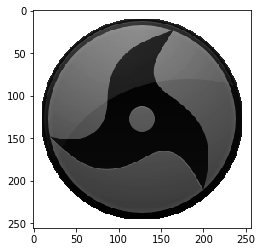

In [7]:
img = cv2.imread("itachi-alt.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="gray")

# A função allclose():
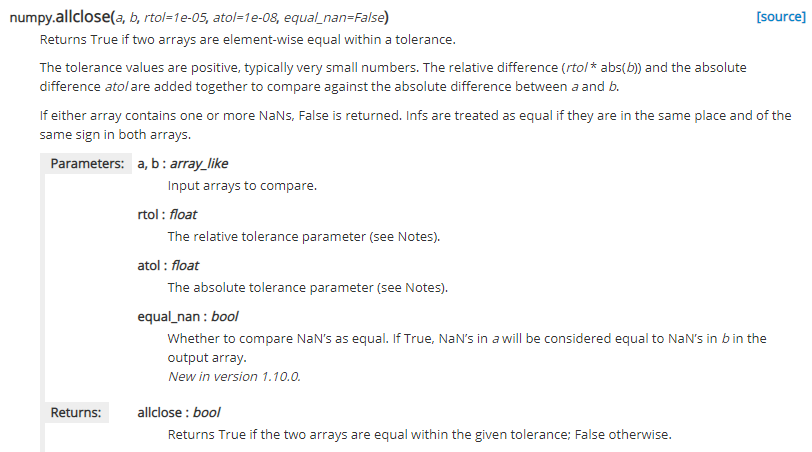

In [8]:
np.allclose(FFT2D(img), np.fft.fft2(img))

True